In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %matplotlib inline
plt.style.use("ggplot")

import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [2]:
homedepot = pd.read_csv(r'...\product_descriptions.csv')
homedepot.shape

(124428, 2)

In [3]:
homedepot = homedepot.dropna()
print(homedepot.shape)
homedepot.head()

(124428, 2)


,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [4]:
product_descriptions1 = homedepot.head(500)
product_descriptions1["product_description"].head(10)

0    Not only do angles make joints stronger, they ...
1    BEHR Premium Textured DECKOVER is an innovativ...
2    Classic architecture meets contemporary design...
3    The Grape Solar 265-Watt Polycrystalline PV So...
4    Update your bathroom with the Delta Vero Singl...
5    Achieving delicious results is almost effortle...
6    The Quantum Adjustable 2-Light LED Black Emerg...
7    The Teks #10 x 1-1/2 in. Zinc-Plated Steel Was...
8    Get the House of Fara 3/4 in. x 3 in. x 8 ft. ...
9    Valley View Industries Metal Stakes (4-Pack) a...
Name: product_description, dtype: object

In [5]:
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions1["product_description"])
X1

<500x8932 sparse matrix of type '<class 'numpy.float64'>'
	with 34817 stored elements in Compressed Sparse Row format>

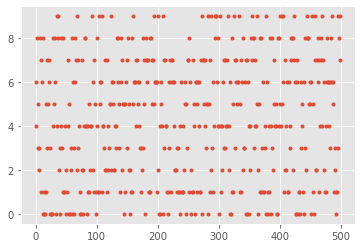

In [6]:
X=X1

kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()

In [7]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

In [13]:
true_k = 20

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print_cluster(i)

Top terms per cluster:
Cluster 0:
 plants
 trees
 gro
 miracle
 popcorn
 stake
 mixing
 measuring
 container
 potting
Cluster 1:
 water
 air
 heater
 toilet
 tank
 easy
 use
 cooling
 installation
 valve
Cluster 2:
 wood
 tile
 floor
 resistant
 vinyl
 dog
 use
 natural
 finish
 planks
Cluster 3:
 bamboo
 window
 shades
 natural
 shade
 canopy
 size
 mount
 windows
 blind
Cluster 4:
 volt
 m12
 battery
 wall
 lithium
 ion
 clock
 20
 compact
 max
Cluster 5:
 steel
 cement
 metal
 gauge
 plated
 screw
 use
 concrete
 pre
 screws
Cluster 6:
 cycle
 oven
 cooking
 wash
 steam
 cu
 drum
 azek
 dryer
 large
Cluster 7:
 vanity
 paint
 finish
 doors
 finished
 using
 board
 24
 mirror
 faucet
Cluster 8:
 landscape
 post
 lumber
 rot
 outdoor
 treated
 projects
 decks
 used
 wood
Cluster 9:
 storage
 shelves
 wall
 door
 cabinet
 room
 finish
 adjustable
 shelf
 design
Cluster 10:
 door
 proposition
 nbsp
 residents
 california
 65
 painted
 moulding
 primed
 wood
Cluster 11:
 light
 led
 watt

In [9]:
def show_recommendations(product):
    #print("Cluster ID:")
    Y = vectorizer.transform([product])
    prediction = model.predict(Y)
    #print(prediction)
    print_cluster(prediction[0])

In [10]:
show_recommendations("cutting tool")

Cluster 4:
 cutting
 tool
 power
 volt
 blade
 saw
 battery
 lithium
 easy
 features


In [11]:
show_recommendations("spray paint")

Cluster 0:
 paint
 wash
 cycle
 projects
 used
 dryer
 brush
 water
 clothes
 dry


In [12]:
show_recommendations("water")

Cluster 2:
 water
 insulation
 heater
 easy
 helps
 use
 fiberglass
 tape
 gas
 valve
